# T12B model: neutrino masses

The idea is to check the anality expresion for neutrino masses with SPHENO. I will use a benchmark point

### Rotation of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 18}) 
#plt.rc('font',size='18')

In [3]:
Gf = 1.16637000E-05
vevSM = 1./np.sqrt(np.sqrt(2.)*Gf)

# Neutrino masses for a benchmark point

In [4]:
#!/usr/bin/env python
import pyslha
import pyT12B_LesHouches_generator
import subprocess
import sys
import NEUTRINO2018
import neutrino_analytic3
import Yukawa_fij

Runing firs time

In [5]:
#Open for the first time
xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

L1sm = 1.3e-1 #Warning
L6 = 1.300E-02
L71 = 1.01e-2
L72 = 2.01e-2
L73 = 3.01e-4
mu31 = 1.01e4
mu32 = 2.01e6
mu33 = 1.01e14

MN = np.exp(np.random.uniform(np.log(100.),np.log(200.)))
MPsi = np.exp(np.random.uniform(np.log(200.),np.log(300.)))
Meta = np.exp(np.random.uniform(np.log(300.),np.log(500.)))
l1 = np.exp(np.random.uniform(np.log(1.0e-2),np.log(1.0e-4)))
l2 = np.exp(np.random.uniform(np.log(1.0e-2),np.log(1.0e-4)))
y1 = np.exp(np.random.uniform(np.log(1.0e-2),np.log(1.0e-4)))
y2 = np.exp(np.random.uniform(np.log(1.0e-2),np.log(1.0e-4)))

# Modific the LesHouches         
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %L1sm     
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L6 
xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33

xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

#Write the Leshouches file for the first time
pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    

#run SPheno for the first time
spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')

MS1 = eval(SPheno_output.split('# Mass spectrum')[1].split()[10])
MS2 = eval(SPheno_output.split('# Mass spectrum')[1].split()[14])
MS3 = eval(SPheno_output.split('# Mass spectrum')[1].split()[18])

mx1 = eval(SPheno_output.split('Fe_3')[1].split()[1])
mx2 = eval(SPheno_output.split('Fe_3')[1].split()[5])
mx3 = eval(SPheno_output.split('Fe_3')[1].split()[9])

U11 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[6])
U12 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[11])
U13 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[16])
U21 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[21])
U22 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[26])
U23 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[31])
U31 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[36])
U32 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[41])
U33 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[46])

V11 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[6])
V12 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[11])
V13 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[16])
V21 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[21])
V22 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[26])
V23 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[31])
V31 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[36])
V32 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[41])
V33 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[46])

L1 = neutrino_analytic3.LAMBDA(mx1, MS1, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS1, V22, U21) +\
        neutrino_analytic3.LAMBDA(mx3, MS1, V32, U31)
L2 = neutrino_analytic3.LAMBDA(mx1, MS2, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS2, V22, U21) +\
        neutrino_analytic3.LAMBDA(mx3, MS2, V32, U31) 
L3 = neutrino_analytic3.LAMBDA(mx1, MS3, V21, U11) + neutrino_analytic3.LAMBDA(mx2, MS3, V22, U21) +\
        neutrino_analytic3.LAMBDA(mx3, MS3, V32, U31) 

LL = np.array([[1./L1 ,0.,0],[0.,1./L2,0.],[0.,0.,1./L3]])

h = Yukawa_fij.yuk_f()[0]
f =np.dot(Yukawa_fij.yuk_f()[1],LL)
mnu1 = ((Yukawa_fij.yuk_f()[2][1])[0,0])**2
mnu2 = ((Yukawa_fij.yuk_f()[2][1])[1,1])**2
mnu3 = ((Yukawa_fij.yuk_f()[2][1])[2,2])**2

In [6]:
#ALGORITM:
f11 = f[0,0]
f21 = f[1,0]
f31 = f[2,0]

f12 = f[0,1]
f22 = f[1,1]
f32 = f[2,1]

f13 = f[0,2]    
f23 = f[1,2]
f33 = f[2,2]

h11 = h[0,0]
h21 = h[1,0]
h31 = h[2,0]

h12 = h[0,1]
h22 = h[1,1]
h32 = h[2,1]

h13 = h[0,2]
h23 = h[1,2]
h33 = h[2,2]

In [7]:
x = []

#Open for the second time
xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

# Modific the LesHouches         
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %L1sm     
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L6 
xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33

xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

xdict.blocks['YHR1IN'].entries[1]='%.6E    # YhR1(1)' %h11 
xdict.blocks['YHR1IN'].entries[2]='%.6E    # YhR1(2)' %h21
xdict.blocks['YHR1IN'].entries[3]='%.6E    # YhR1(3)' %h31

xdict.blocks['YHR2IN'].entries[1]='%.6E    # YhR2(1)' %h12 
xdict.blocks['YHR2IN'].entries[2]='%.6E    # YhR2(2)' %h22
xdict.blocks['YHR2IN'].entries[3]='%.6E    # YhR2(3)' %h32

xdict.blocks['YHR3IN'].entries[1]='%.6E    # YhR3(1)' %h13 
xdict.blocks['YHR3IN'].entries[2]='%.6E    # YhR3(2)' %h23
xdict.blocks['YHR3IN'].entries[3]='%.6E    # YhR3(3)' %h33

xdict.blocks['YFR1IN'].entries[1]='%.6E    # YfR1(1)' %f11 
xdict.blocks['YFR1IN'].entries[2]='%.6E    # YfR1(2)' %f21
xdict.blocks['YFR1IN'].entries[3]='%.6E    # YfR1(3)' %f31

xdict.blocks['YFR2IN'].entries[1]='%.6E    # YfR2(1)' %f12 
xdict.blocks['YFR2IN'].entries[2]='%.6E    # YfR2(2)' %f22
xdict.blocks['YFR2IN'].entries[3]='%.6E    # YfR2(3)' %f32

xdict.blocks['YFR3IN'].entries[1]='%.6E    # YfR3(1)' %f13 
xdict.blocks['YFR3IN'].entries[2]='%.6E    # YfR3(2)' %f23
xdict.blocks['YFR3IN'].entries[3]='%.6E    # YfR3(3)' %f33

#Write the Leshouches file for the second time
pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    

#run SPheno for the second time
spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')

##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
if SPheno_output.split('# Fk')[1].split()[1] == "NaN":
    mv1 = 0.
else: 
    mv1 = eval(SPheno_output.split('# Fk')[1].split()[1])           
mv2 = eval(SPheno_output.split('# Fk')[1].split()[5])       
mv3 = eval(SPheno_output.split('# Fk')[1].split()[9])  

x.append([L1,L6,L71,L72,L73,mu31,mu32,mu33,MN,MPsi,Meta,l1,l2,y1,y2,h11,h21,h31,h12,h22,h32,h13,h23,h33,f11,f21,f31,\
          f12,f22,f32,f13,f23,f33,mv1,mv2,mv3,MS1,MS2,MS3,mx1,mx2,mx3,V11,V12,V13,V21,V22,V23,V31,V32,V33,\
          U11,U12,U13,U21,U22,U23,U31,U32,U33])

x=np.asarray(x)
    
xd=pd.DataFrame(x,columns=['L1','L6','L71','L72','L73','mu31','mu32','mu33','MN','MPsi','Meta','l1','l2','y1','y2',\
                           'h11','h21','h31','h12','h22','h32','h13','h23','h33','f11','f21','f31','f12','f22',\
                           'f32','f13','f23','f33','mv1','mv2','mv3','MS1','MS2','MS3','mx1','mx2','mx3',\
                           'V11','V12','V13','V21','V22','V23','V31','V32','V33','U11','U12','U13','U21',\
                           'U22','U23','U31','U32','U33'])       

In [8]:
print("mx1=",mx1,"mx2=",mx2,"mx3=",mx3)
print(f11,f12,f13,f21,f22,f23,f31,f32,f33)
print(h11,h12,h13,h21,h22,h23,h31,h32,h33)

mx1= 114.695094 mx2= 236.031109 mx3= 476.225172
0.0 0.0 0.0 0.00146629911826 0.0048961133087 -0.00480808963009 -0.0142597535285 -0.0296560133652 0.0267373925357
0.0181200661305 0.000251095967482 0.000317739745094 0.00684737342621 0.0169253003944 0.415898124181 0.0389676214976 0.000436936255055 0.346285538691


In [9]:
#run anality
MM = neutrino_analytic3.MATRIX_NU_DIAG(xd.h11[0],xd.h12[0],xd.h13[0],xd.h21[0],xd.h22[0],xd.h23[0],xd.h31[0],xd.h32[0],xd.h33[0],\
                    xd.f11[0],xd.f12[0],xd.f13[0],xd.f21[0],xd.f22[0],xd.f23[0],xd.f31[0],xd.f32[0],xd.f33[0],\
                    xd.MS1[0],xd.MS2[0],xd.MS3[0],xd.mx1[0],xd.mx2[0],xd.mx3[0],xd.V12[0],xd.V22[0],xd.V32[0],\
                    xd.U11[0],xd.U21[0],xd.U31[0])

In [11]:
print("EXPERIMENTAL:")
print("nuexp2=",mnu2,"nuexp3=",mnu3)
print("===============================================")
print("ANALITY:")
print("mv2=",MM[1],"mv3=",MM[2])
print("===============================================")
print("SPHENO:")
print("mv1=",mv1,"mv2=",mv2,"mv3=",mv3)
print("===============================================")

EXPERIMENTAL:
nuexp2= 8.92704824292e-12 nuexp3= 4.97370467753e-11
ANALITY:
mv2= 9.08202433477e-14 mv3= 1.16668561077e-12
SPHENO:
mv1= 0.0 mv2= 9.84584642e-15 mv3= 1.23482749e-12


EXPERIMENTAL:
nuexp2= 8.79601213415e-12 nuexp3= 4.92458170445e-11
ANALITY:
mv2= 9.72054227491e-12 mv3= 3.89797713977e-11
SPHENO:
mv2= 9.82877186e-12 mv3= 3.96594599e-11


Add to the DataFrame

In [97]:
y=[]
for i in range(0,xd.shape[0]):
    
    kk = neutrino_analytic3.MATRIX_NU_DIAG(xd.h11[i],xd.h12[i],xd.h13[i],xd.h21[i],xd.h22[i],xd.h23[i],xd.h31[i],\
                                           xd.h32[i],xd.h33[i],xd.f11[i],xd.f12[i],xd.f13[i],xd.f21[i],xd.f22[i],\
                                           xd.f23[i],xd.f31[i],xd.f32[i],xd.f33[i],xd.MS1[i],xd.MS2[i],xd.MS3[i],\
                                           xd.mx1[i],xd.mx2[i],xd.mx3[i],xd.V12[i],xd.V22[i],xd.V32[i],xd.U11[i],\
                                           xd.U21[i],xd.U31[i])
    mn1 = kk[0]
    mn2 = kk[1]
    mn3 = kk[2]
    
    y.append([mn1,mn2,mn3])
    
y=np.asarray(y)
    
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])     

In [98]:
yd[:3]

,mn1,mn2,mn3
0,1.485603e-18,4.699461e-12,2.711542e-10


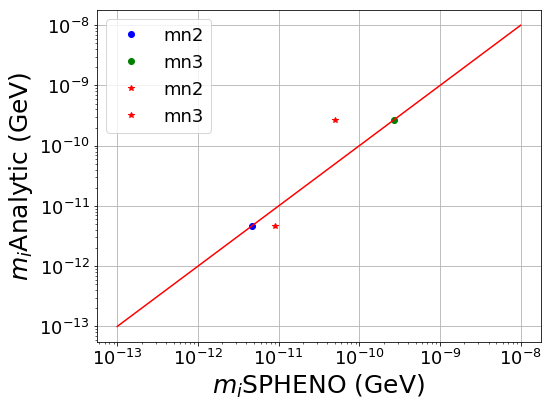

In [99]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,yd.mn1,'ro')
plt.loglog(xd.mv2,yd.mn2,'bo')
plt.loglog(xd.mv3,yd.mn3,'go')
plt.loglog(k['mnu2'],yd.mn2,'r*')
plt.loglog(k['mnu3'],yd.mn3,'r*')

a = np.linspace(1e-13,1e-8,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

In [20]:
xd['mv1'][:3]

0    1.285379e-19
1    3.601471e-19
2    7.969420e-19
Name: mv1, dtype: float64

In [28]:
yd['mn1'][:3]

0    5.303873e-22
1    3.829254e-21
2    1.406639e-21
Name: mn1, dtype: float64

Longas overleaf notes

$$
\sum_{i=1}^3 m_{\chi^0_l} U_{2l}^{*}V_{1l} = 0
$$

In [29]:
mx1*U21*V11 + mx2*U22*V12 + mx3*U23*V13

0.0005505459530911696

me

$$
\sum_{i=1}^3 m_{\chi^0_l} U_{j1}^{*}V_{j2} = 0
$$

In [43]:
mx1*U11*V12 + mx2*U21*V22 + mx3*U31*V32

7.38713563777065e-10

In [18]:
xd.mx1*xd.U11*xd.V12 + xd.mx2*xd.U21*xd.V22 + xd.mx3*xd.U31*xd.V32

0    5.570716e-10
1    2.337691e-09
2   -8.570166e-10
dtype: float64

In [19]:
xd.mx1*xd.V11*xd.U12 + xd.mx2*xd.V21*xd.U22 + xd.mx3*xd.V31*xd.U32

0    1.204261e-09
1   -3.333440e-10
2    3.564216e-09
dtype: float64